## Read the scraped Data

In [57]:
def readtxt(path):
    f = open(path, 'r+')
    data = f.readlines()
    return data

In [62]:
data = readtxt('./hypertension.csv')

In [63]:
# print small sample of data
data[:4]

['title,comments\n',
 'If you take Valsartan tablets with amlodipine and/or hydrochlorothiazide - PLEASE READ THIS!,"It’s Valsartan with built in hydro...also,  it’s the brand name that is tainted.  "\n',
 'How are online platforms used for health related reasons?\n',
 'Working on A College Research Project on Rising Medical Prices for Chronic Conditions and Looking to Interview People Dealing With HBP\n']

## Use wordcloud to visualize the most common words appeared in reddit

In [55]:
#!/usr/bin/env python
"""
Masked wordcloud
================
Using a mask you can generate wordclouds in arbitrary shapes.
"""

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'hypertension.csv')).read()

# read the mask image
heart_mask = np.array(Image.open(path.join(d, "heart.jpg")))

stopwords = set(STOPWORDS)
customized_stopwords = ["said","don","thing","never","always","things","might","done","something","re","really","will","even"]
for item in customized_stopwords:
    stopwords.add(item)


wc = WordCloud(background_color="white", max_words=150, mask=heart_mask,
               stopwords=stopwords, contour_width=5, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "heart.png"))



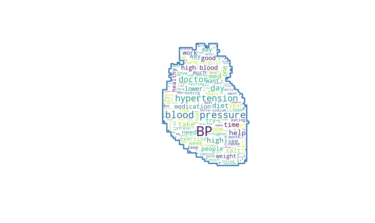

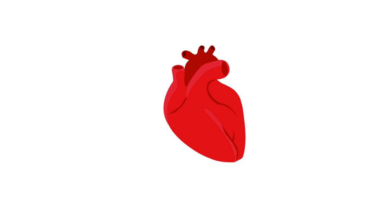

In [56]:
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

## Topic modeling using LDA

In [86]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = 10
 
vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
                             stop_words='english', lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(data)
 
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_topics=NUM_TOPICS, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)
print(lda_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
# Build a Non-Negative Matrix Factorization Model
nmf_model = NMF(n_components=NUM_TOPICS)
nmf_Z = nmf_model.fit_transform(data_vectorized)
print(nmf_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
# Build a Latent Semantic Indexing Model
lsi_model = TruncatedSVD(n_components=NUM_TOPICS)
lsi_Z = lsi_model.fit_transform(data_vectorized)
print(lsi_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
 
# Let's see how the first document in the corpus looks like in different topic spaces
print(lda_Z[0])
print(nmf_Z[0])
print(lsi_Z[0])


<>:8: DeprecationWarning: invalid escape sequence \-
<>:8: DeprecationWarning: invalid escape sequence \-
<>:8: DeprecationWarning: invalid escape sequence \-
<ipython-input-86-f089c12809eb>:8: DeprecationWarning: invalid escape sequence \-
  token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
/home/yong/py3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


(471, 10)
(471, 10)
(471, 10)
[0.05       0.05       0.05       0.05       0.05       0.05
 0.05       0.05       0.05       0.54999999]
[0.         0.         0.         0.         0.05339574 0.
 0.         0.         0.         0.        ]
[ 0.00314975  0.00828795  0.01880593  0.03376807  0.13256672  0.0662629
  0.06391367  0.08002434  0.0348806  -0.02957344]


In [87]:
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
 
print("LDA Model:")
print_topics(lda_model, vectorizer)
print("=" * 20)
 
print("NMF Model:")
print_topics(nmf_model, vectorizer)
print("=" * 20)
 
print("LSI Model:")
print_topics(lsi_model, vectorizer)
print("=" * 20)
 


LDA Model:
Topic 0:
[('time', 5.747073856280606), ('losartan', 4.975580940321675), ('long', 4.907942584207788), ('started', 4.639297829554845), ('walking', 4.612359751609848), ('pain', 4.385174361752564), ('breathing', 4.332597692599636), ('start', 4.158187190291543), ('effect', 3.260314711126952), ('doing', 2.8638137968427735)]
Topic 1:
[('medication', 11.471057933744488), ('doing', 7.477481326758927), ('day', 4.730696636106164), ('doctors', 4.722193544671801), ('helped', 4.6097162013444875), ('interested', 3.967774867052667), ('hour', 3.9517031128753537), ('salt', 3.945172352681505), ('started', 3.3314575688780566), ('went', 3.0387038375876374)]
Topic 2:
[('diet', 32.97106044538773), ('eat', 19.64029017805685), ('weight', 13.515104826221734), ('eating', 12.664860678473243), ('foods', 11.562452855214872), ('dash', 10.427118215337615), ('healthy', 10.286426398186695), ('little', 8.51352407129083), ('body', 8.258219184791379), ('like', 8.076936889591002)]
Topic 3:
[('doctor', 8.40670222

In [90]:
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

Loading BokehJS ...

In [146]:
svd = TruncatedSVD(n_components=2)
words_2d = svd.fit_transform(data_vectorized.T)
 
df = pd.DataFrame(columns=['x', 'y', 'word'])
df['x'], df['y'], df['word'] = words_2d[:,0], words_2d[:,1], vectorizer.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

 
 


In [140]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
 
NUM_TOPICS = 10
 
vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
                             stop_words='english', lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=273,
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data)
data_vectorized = vectorizer.fit_transform(data)
 
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_topics=NUM_TOPICS, max_iter=10, learning_method='online')
nmf = NMF(n_components =NUM_TOPICS, random_state=1, alpha=0.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
lda_Z = lda_model.fit_transform(data_vectorized)
 
text = "The economy is working better than ever"
x = lda_model.transform(vectorizer.transform([text]))[0]
print(x, x.sum())

<>:9: DeprecationWarning: invalid escape sequence \-
<>:9: DeprecationWarning: invalid escape sequence \-
<>:9: DeprecationWarning: invalid escape sequence \-
<ipython-input-140-463369936e8b>:9: DeprecationWarning: invalid escape sequence \-
  token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
/home/yong/py3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


[0.03333334 0.03333333 0.03333333 0.03335162 0.69993716 0.03337568
 0.03333552 0.03333334 0.03333334 0.03333334] 1.0


In [141]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/home/yong/py3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.032193 -0.002321       1        1  48.870333
6      0.109255 -0.007488       2        1  23.817898
5      0.147684  0.089249       3        1   8.345974
2      0.054753  0.117522       4        1   4.411774
1     -0.302185  0.059523       5        1   4.170748
0     -0.072298 -0.042045       6        1   2.827006
7      0.003252 -0.206057       7        1   2.747786
9      0.034927 -0.087897       8        1   2.492170
8     -0.025541  0.033635       9        1   1.159080
3      0.017960  0.045879      10        1   1.157233, topic_info=    Category        Freq          Term       Total  loglift  logprob
36   Default   26.000000           com   26.000000  30.0000  30.0000
42   Default   46.000000           day   46.000000  29.0000  29.0000
49   Default   50.000000          diet   50.000000  28.0000  28.0000
109  Default   20.000000         https   20.000000  27.0000  27.0000
134  Default   36.000000          like   36.000000  26.0000  26.0000
99   Default   32.000000          help   32.000000  25.0000  25.0000
269  Default   18.000000           www   18.000000  24.0000  24.0000
88   Default   39.000000          good   39.000000  23.0000  23.0000
158  Default   26.000000    medication   26.000000  22.0000  22.0000
103  Default   77.000000          high   77.000000  21.0000  21.0000
262  Default   36.000000        weight   36.000000  20.0000  20.0000
70   Default   21.000000      exercise   21.000000  19.0000  19.0000
191  Default   96.000000      pressure   96.000000  18.0000  18.0000
96   Default   15.000000        health   15.000000  17.0000  17.0000
18   Default  100.000000         blood  100.000000  16.0000  16.0000
111  Default   73.000000  hypertension   73.000000  15.0000  15.0000
126  Default   21.000000          know   21.000000  14.0000  14.0000
246  Default   25.000000           try   25.000000  13.0000  13.0000
146  Default   19.000000           low   19.000000  12.0000  12.0000
147  Default   33.000000         lower   33.000000  11.0000  11.0000
161  Default   40.000000          meds   40.000000  10.0000  10.0000
234  Default   14.000000           tea   14.000000   9.0000   9.0000
258  Default   22.000000           way   22.000000   8.0000   8.0000
53   Default   43.000000        doctor   43.000000   7.0000   7.0000
201  Default   26.000000        really   26.000000   6.0000   6.0000
212  Default   36.000000          salt   36.000000   5.0000   5.0000
188  Default   14.000000     potassium   14.000000   4.0000   4.0000
271  Default   16.000000         years   16.000000   3.0000   3.0000
225  Default   17.000000        stress   17.000000   2.0000   2.0000
183  Default   31.000000        people   31.000000   1.0000   1.0000
..       ...         ...           ...         ...      ...      ...
135  Topic10    0.097065          link    4.960070   0.5253  -6.0496
152  Topic10    0.097057        making    5.022450   0.5128  -6.0497
74   Topic10    0.095965           far    5.036538   0.4987  -6.0610
64   Topic10    0.097644        easily    5.133874   0.4968  -6.0437
72   Topic10    0.098448    experience    5.203032   0.4917  -6.0355
193  Topic10    0.096112      probably    5.175207   0.4730  -6.0595
174  Topic10    0.095840           non    5.189774   0.4674  -6.0623
21   Topic10    0.095047     breathing    5.168547   0.4632  -6.0706
71   Topic10    0.098670     exercises    5.376874   0.4611  -6.0332
162  Topic10    0.097482          mind    5.337030   0.4564  -6.0453
164  Topic10    0.097390           mom    5.335093   0.4558  -6.0463
94   Topic10    0.096512         haven    5.309569   0.4515  -6.0553
3    Topic10    0.093807           add    5.176781   0.4484  -6.0838
125  Topic10    0.096637       kidneys    5.343486   0.4465  -6.0540
155  Topic10    0.097044          mean    5.385554   0.4428  -6.0498
191  Topic10    0.202596      pressure   96.564592  -1.7076  -5.31